# PART 2




# Linear regression



#### Introduction on terms

- $  \mathbf{y} = \mathbf{X} \mathbf{b} + \epsilon $
- $  \mathbf{y}$ is the $n×1$ vector of observations
- $X$ is the $n×(p+1)$ design matrix (where p is the number of predictor variables; $p=1$ in your simple example, plus the intercept column).
- $b$ is the $(p+1)×1$ vector of unknown coefficients $([b0​,b1​,...,bp​]^T)$.
- $\epsilon$ is the $n×1$ vector of unknown errors or residuals
- We want to find the estimate $\hat b$ for the unknown $b$ that "best" fits the data




#### Jumping into the line
We are just finding a fit. Say given a list of points of (x,y), we want to find a line that best fits that line.


One way of thinking about this, is we want a line where we minimize the distance between the total distances between the actual (x,y)s.


So I want a line that minmizes $ \Sigma _{i=1} ^n | y_i -  (b_1 \times x_i + b_0)  | $


#### Note on Norms

That above part is note entirely true.


The above is an $L_1$ norm, $L_2$ is actually what we want to optimize to, because $L_1$ may not be deferentialable.



$ \textbf{L}(\textbf{b})  = min | \hat y - \textbf{X} \hat b | ^ 2 $  

##### Note
- we use $\textbf{b}$ here, as we are minimizing with respect to the variable $\textbf{b}$. The solution will be $ \hat b $


- Here is a slightly different representation, where 


$
X \;=\;
$
$
\begin{pmatrix}
1 & x_{1} \\[6pt]
\vdots & \vdots \\[6pt]
1 & x_{n}
\end{pmatrix}
\quad,\quad
\mathbf{b} \;=\;
\begin{pmatrix}
b_{0} \\[4pt]
b_{1}
\end{pmatrix}
$



- Also note,  $|| v || _2 ^2 = v ^T v $. With this we can factor out the square to get

$ \| \mathbf{y} - \mathbf{X} \mathbf{b} \|_2^2 = (\mathbf{y} - \mathbf{X} \mathbf{b})^\top (\mathbf{y} - \mathbf{X} \mathbf{b}).$


#### Graideient time

Since we are looking to minimize by changing value of $\mathbf{b}$,

this is saying we want to take the graidient/derivative.


Since $L$ is a quadratic form in $\mathbf{b}$, it is everywhere smooth, and we can compute its gradient in closed form:

$L(\mathbf{b}) = (\mathbf{y}^T - \mathbf{b}^T \mathbf{X}^T)(\mathbf{y} - \mathbf{X}\mathbf{b})$


$L(\mathbf{b}) = \mathbf{y}^T \mathbf{y} - \mathbf{y}^T \mathbf{X} \mathbf{b} - \mathbf{b}^T \mathbf{X}^T \mathbf{y} + \mathbf{b}^T \mathbf{X}^T \mathbf{X} \mathbf{b}$


* Note that $\mathbf{y}^T \mathbf{X} \mathbf{b}$ is a scalar, so it equals its transpose: $(\mathbf{y}^T \mathbf{X} \mathbf{b})^T = \mathbf{b}^T \mathbf{X}^T \mathbf{y}$. Thus, the two middle terms are identical.
        $L(\mathbf{b}) = \mathbf{y}^T \mathbf{y} - 2 \mathbf{b}^T \mathbf{X}^T \mathbf{y} + \mathbf{b}^T \mathbf{X}^T \mathbf{X} \mathbf{b}$

    * Now take the gradient with respect to $\mathbf{b}$. Also note  matrix calculus rules :
        * $\nabla_{\mathbf{b}} (\mathbf{c}^T \mathbf{b}) = \nabla_{\mathbf{b}} (\mathbf{b}^T \mathbf{c}) = \mathbf{c}$
        * $\nabla_{\mathbf{b}} (\mathbf{b}^T \mathbf{A} \mathbf{b}) = 2 \mathbf{A} \mathbf{b}$ (for symmetric $\mathbf{A}$; note $\mathbf{X}^T \mathbf{X}$ is symmetric).

    * Applying these rules gives:
        $\nabla_{\mathbf{b}} L(\mathbf{b}) = \mathbf{0} - 2 \mathbf{X}^T \mathbf{y} + 2 \mathbf{X}^T \mathbf{X} \mathbf{b}$

    * Set the gradient to zero for the minimum (letting $\hat{\mathbf{b}}$ be the value of $\mathbf{b}$ at the minimum):
        $-2 \mathbf{X}^T \mathbf{y} + 2 \mathbf{X}^T \mathbf{X} \hat{\mathbf{b}} = \mathbf{0}$
        $2 \mathbf{X}^T \mathbf{X} \hat{\mathbf{b}} = 2 \mathbf{X}^T \mathbf{y}$
        $\mathbf{X}^T \mathbf{X} \hat{\mathbf{b}} = \mathbf{X}^T \mathbf{y}$ (These are the **Normal Equations**)



$$ \nabla_\mathbf{b} L(\mathbf{b}) = \nabla_\mathbf{b} [ \mathbf{y}^\top \mathbf{y} - 2 \mathbf{b}^\top \mathbf{X}^\top \mathbf{y} + \mathbf{b}^\top \mathbf{X}^\top \mathbf{X} \mathbf{b} ] $$

$$ = -2 \mathbf{X}^\top \mathbf{y} + 2 \mathbf{X}^\top \mathbf{X} \mathbf{b}. $$



Why this works:

    Because L is a convex quadratic in b, a vanishing gradient is both necessary for a global minimum.

    If instead we had used $\Sigma ∣y_i−(b_1 x_i + b+1 )∣ \Sigma ∣y_i ​−(b_1 ​x_i​ +b_0​)∣$, the absolute‐value makes L non-differentiable at residuals =0, so we cannot simply set a gradient to zero.



## Also note important aspect of invertibility

When $\mathbf{X}^\top \mathbf{X}$ is invertible, we simply multiply both sides of
$$ \mathbf{X}^\top \mathbf{X} \hat{\mathbf{b}} = \mathbf{X}^\top \mathbf{y} $$
by $(\mathbf{X}^\top \mathbf{X})^{-1}$:
$$ \boxed{\hat{\mathbf{b}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}}. $$


## Also note Geometric meaning:Orthogonal Projection of y onto Col(X)

##### Column Space and Projection

* The **column space** $Col(X) \subset \mathbb{R}^n$ is the set of all linear combinations of the columns of $X$.
* Every candidate fit $X \mathbf{b}$ lies somewhere in that subspace.
* Among all those, the *closest* vector to $\mathbf{y}$ (in Euclidean distance) is its **orthogonal projection** onto $Col(X)$.
* Every new column adds a dimension to $Col⁡(X)$. The projection plane grows, reducing the residual norm $∥r∥$ unless the new column lies inside the existing span (perfect multicollinearity)



#### The "Hat" Matrix

Define
$$ H = X (X^\top X)^{-1} X^\top. $$
Then
$$ \hat{\mathbf{y}} = X \hat{\mathbf{b}} = X (X^\top X)^{-1} X^\top \mathbf{y} = H \mathbf{y}. $$
Properties of $H$:
1.  $H$ is symmetric ($H = H^\top$).
2.  $H$ is idempotent ($H^2 = H$).

These are exactly the two conditions characterizing an *orthogonal projector*.


#### Residual Orthogonality

Let the residual be $\mathbf{r} = \mathbf{y} - \hat{\mathbf{y}}$. Then
$$ X^\top \mathbf{r} = X^\top (\mathbf{y} - X \hat{\mathbf{b}}) = X^\top \mathbf{y} - (X^\top X) \hat{\mathbf{b}} = \mathbf{0}, $$
i.e.\ $\mathbf{r}$ is orthogonal to **every** column of $X$, confirming we have the *shortest* possible residual.




# PART 3

### PART 3A Get Data
Note this data was attained from Kaggle's archive.
80 years worth of farming data

In [49]:
import pandas as pd
import numpy as np


df = pd.read_csv('farm_production_dataset.csv')
df.dropna(inplace=True)
df.head(3)


,REF_DATE,GEO,Type of crop,Average farm price (dollars per tonne),Average yield (kilograms per hectare),Production (metric tonnes),Seeded area (acres),Seeded area (hectares),Total farm value (dollars)
0,1908,AB,Barley,15.0,1585.0,84000.0,129800.0,53000.0,1296
1,1908,AB,Flaxseed,29.0,950.0,1900.0,5900.0,2000.0,56
2,1908,AB,Oats,18.0,1675.0,352000.0,519400.0,210000.0,6316


### PART 3A Simple linear regression

The aim is to predict `total farm value` of California Oats farm, using `Production (metric tonnes)`

Apart of this is learning linear regression, learning python and playing around.

In [50]:
title = 'Production (metric tonnes)'
X = df[title].values.reshape(-1, 1)  # Reshape for scikit-learn
y = df['Total farm value (dollars)'].values

beta =  [ 6.58156013e-02 -1.15158007e+04]


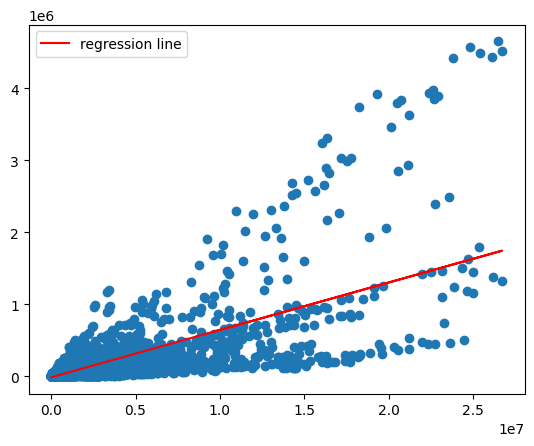

In [51]:
import numpy as np
from matplotlib import pyplot as plt

def RinasCode(X, y):
    x = X.flatten() 
    # print([x, y])

    A = np.array([x,np.ones(len(x))]).transpose()
    # print ("A = ", A)

    beta = np.linalg.inv(A.transpose()@A)@A.transpose()@y
    print("beta = ", beta)

    # print([x, y])

    plt.scatter(x,y)

    plt.plot(x, beta[1] + beta[0]*x, label="regression line", color = "red")
    plt.legend()
    plt.show()

RinasCode(X, y)

#### Compare using a library

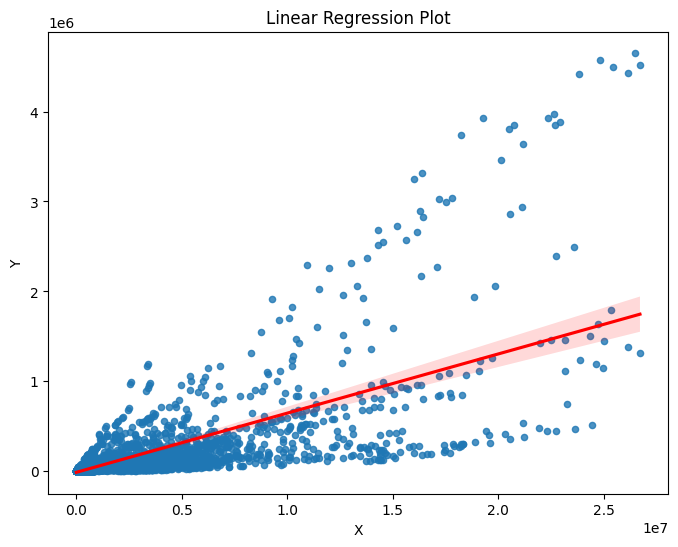

R-squared: 0.5286781430988654
Mean Squared Error (MSE): 30243531517.850513
Root Mean Squared Error (RMSE): 173906.67473633814


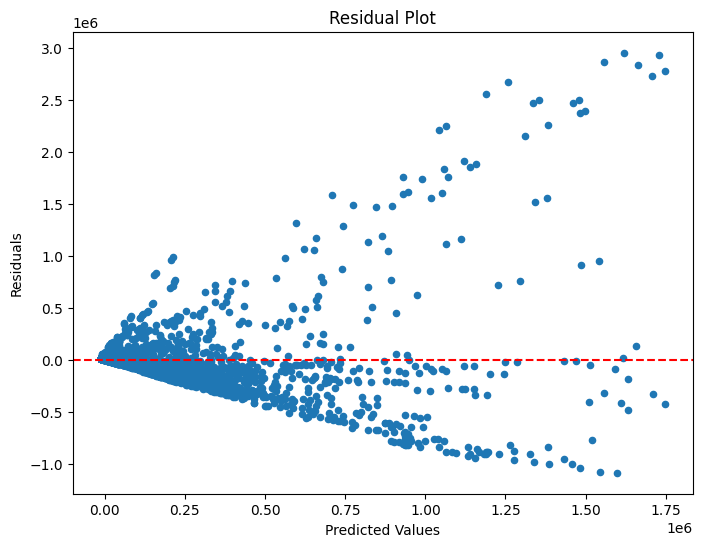

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
def skLearnWay(X,y, title):
    model = LinearRegression()
    model.fit(X, y)
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.regplot(x=title, y='Total farm value (dollars)', data=df, scatter_kws={'s': 20}, line_kws={'color': 'red'})
    plt.title('Linear Regression Plot')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    


# Make predictions
    y_pred = model.predict(X)

    # Calculate metrics
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    # Print metrics
    print(f"R-squared: {r2}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    # Residual Plot
    residuals = y - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, s=20)
    plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()
skLearnWay(X, y, title)

### PART 3A Simple linear regression with X being "Seeded area (acres)"
The aim is to predict `total farm value` with `Seeded area (acres)`



beta =  [ 4.82437273e-02 -5.61716348e+03]


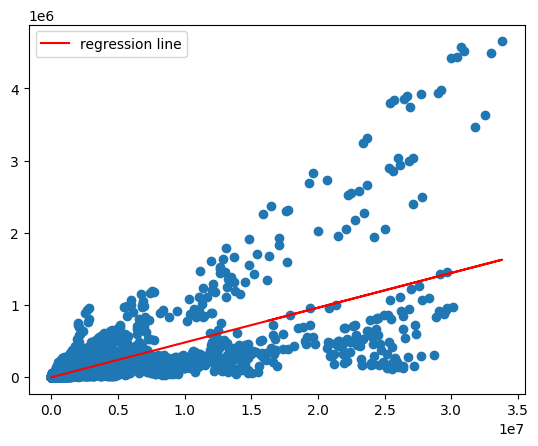

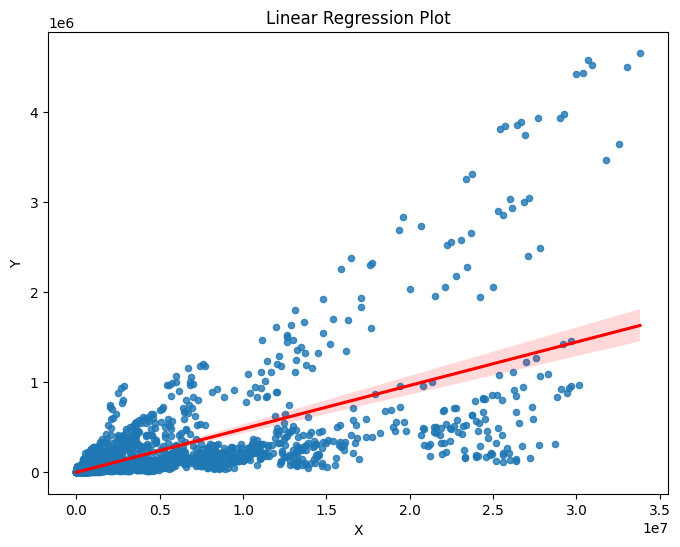

R-squared: 0.4988444613459828
Mean Squared Error (MSE): 32157883422.341312
Root Mean Squared Error (RMSE): 179326.19279497713


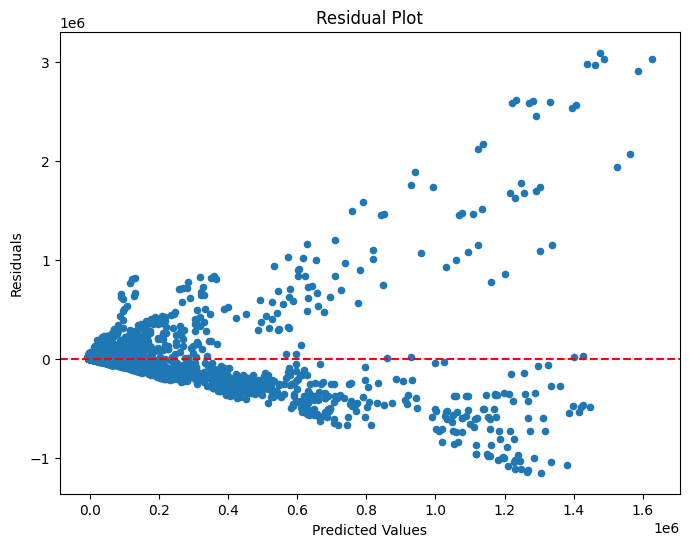

In [53]:
title = "Seeded area (acres)"
X = df[title].values.reshape(-1, 1) 
y = df['Total farm value (dollars)'].values
RinasCode(X, y)
skLearnWay(X,y, title)


In [54]:
correlation = df['Production (metric tonnes)'].corr(df["Seeded area (acres)"], method='spearman')
print(f"Wow high correlation {correlation}")

Wow high correlation 0.9339939850700645


Comparing to `Production (metric tonnes` with `Seeded area (acres)`, interms of using them for the dependent variables results in almost the same plot.

Note the correlation is very high between the two.
What if we try with a variable not as correlated?



In [55]:
numeric_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

print(correlation_matrix)

                                        REF_DATE  \
REF_DATE                                1.000000   
Average farm price (dollars per tonne)  0.453547   
Average yield (kilograms per hectare)   0.095821   
Production (metric tonnes)              0.130514   
Seeded area (acres)                     0.065219   
Seeded area (hectares)                  0.065274   
Total farm value (dollars)              0.205550   

                                        Average farm price (dollars per tonne)  \
REF_DATE                                                              0.453547   
Average farm price (dollars per tonne)                                1.000000   
Average yield (kilograms per hectare)                                -0.233311   
Production (metric tonnes)                                           -0.033814   
Seeded area (acres)                                                   0.015050   
Seeded area (hectares)                                                0.015068   
Total far

beta =  [  718.33797005 14108.43161874]


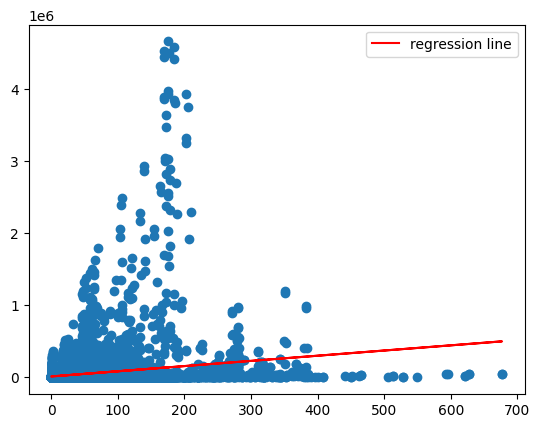

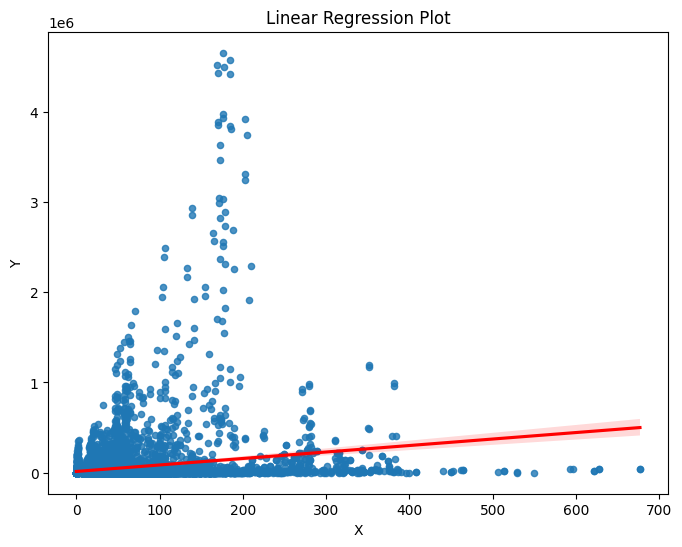

R-squared: 0.03269216951109699
Mean Squared Error (MSE): 62069697024.4503
Root Mean Squared Error (RMSE): 249137.90764243467


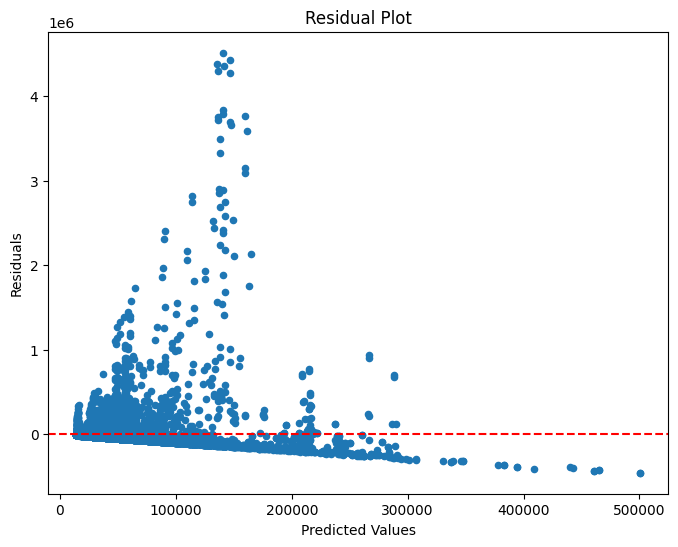

In [56]:
title = "Average farm price (dollars per tonne)"
X = df[title].values.reshape(-1, 1) 
RinasCode(X, y)
skLearnWay(X,y, title)


Well this is not very correlated, and I would say from visual inspection this does not fit well.

Let's try to use some tool to see the difference in fits.

### PART 3B linear with multi variable regression

The aim is to predict `total farm value` of California Oats farm, using `Seeded area (acres)`

Apart of this is learning linear regression, learning python and playing around.

Coefficients: [ 7.78515854e+02  5.25215268e-01  4.36506219e-02  2.02095221e-02
 -6.21810724e+04]


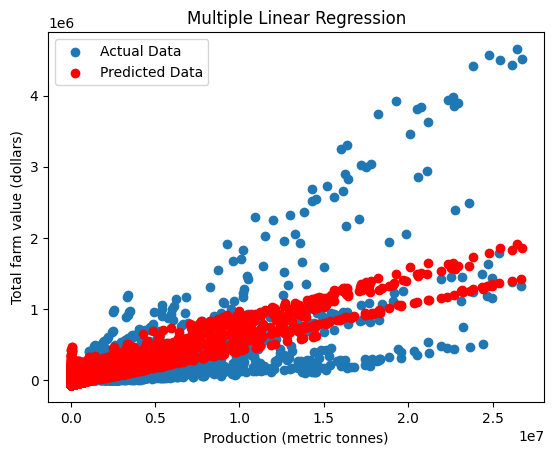

In [57]:
X = df[["Average farm price (dollars per tonne)" ,'Average yield (kilograms per hectare)', 'Production (metric tonnes)', 'Seeded area (acres)']].values


# Get the dependent variable
y = df['Total farm value (dollars)'].values


# Add a column of ones for the intercept term
# Add column of 1s for intercept
X = np.c_[X, np.ones(X.shape[0])]  


# Calculate coefficients using the normal equation
beta = np.linalg.solve(X.T @ X, X.T @ y)

# Print the coefficients
print("Coefficients:", beta)

# Make predictions
y_pred = X @ beta

# Plot the results 
# Use filtered_df for both x and y to ensure they have the same size
plt.scatter(df['Production (metric tonnes)'], y, label="Actual Data") # Changed df to filtered_df
plt.scatter(df['Production (metric tonnes)'], y_pred, label="Predicted Data", color="red") # Changed df to filtered_df
plt.xlabel("Production (metric tonnes)")
plt.ylabel("Total farm value (dollars)")
plt.legend()
plt.title("Multiple Linear Regression")
plt.show()

#### Instead of using more than 3 varibales, use to to predict y so we can have a 3d plot

Coefficients: [ 8.16949404e+02  6.64449809e-02 -6.00525933e+04]


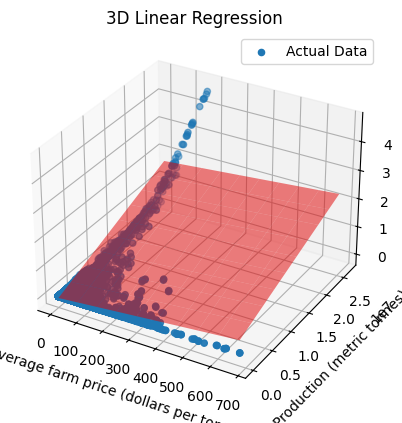

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = df[["Average farm price (dollars per tonne)", 'Production (metric tonnes)']].values
y = df['Total farm value (dollars)'].values
X = np.c_[X, np.ones(X.shape[0])] 

beta = np.linalg.solve(X.T @ X, X.T @ y)
print("Coefficients:", beta)

y_pred = X @ beta

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data
ax.scatter(df['Average farm price (dollars per tonne)'], df['Production (metric tonnes)'], y, label="Actual Data")

# Plot the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(df['Average farm price (dollars per tonne)'].min(), df['Average farm price (dollars per tonne)'].max(), 10), 
                               np.linspace(df['Production (metric tonnes)'].min(), df['Production (metric tonnes)'].max(), 10))
X_surf = np.c_[x1_surf.ravel(), x2_surf.ravel(), np.ones(x1_surf.ravel().shape)]
y_pred_surf = X_surf @ beta
y_pred_surf = y_pred_surf.reshape(x1_surf.shape)

ax.plot_surface(x1_surf, x2_surf, y_pred_surf, alpha=0.5, color='red')  # Regression plane

ax.set_xlabel('Average farm price (dollars per tonne)')
ax.set_ylabel('Production (metric tonnes)')
ax.set_zlabel('Total farm value (dollars)')
ax.legend()
plt.title("3D Linear Regression")
plt.show()

### Here is just comparing sklearn with our code to ensure it is equal

In [59]:
X_np = df[["Average farm price (dollars per tonne)", 'Average yield (kilograms per hectare)', 'Production (metric tonnes)', 'Seeded area (acres)']].values
y_np = df['Total farm value (dollars)'].values
X_np = np.c_[X_np, np.ones(X_np.shape[0])]  # Add column of 1s for intercept

beta_np = np.linalg.solve(X_np.T @ X_np, X_np.T @ y_np)
y_pred_np = X_np @ beta_np


# 2. Using scikit-learn's LinearRegression:
X_sklearn = df[["Average farm price (dollars per tonne)", 'Average yield (kilograms per hectare)', 'Production (metric tonnes)', 'Seeded area (acres)']].values
y_sklearn = df['Total farm value (dollars)'].values

model = LinearRegression()
model.fit(X_sklearn, y_sklearn)
y_pred_sklearn = model.predict(X_sklearn)

# 3. Calculate and print MSE and R² for both:
mse_np = mean_squared_error(y_np, y_pred_np)
r2_np = r2_score(y_np, y_pred_np)

mse_sklearn = mean_squared_error(y_sklearn, y_pred_sklearn)
r2_sklearn = r2_score(y_sklearn, y_pred_sklearn)

print("NumPy Implementation:")
print(f"  Coefficients: {beta_np}")
print(f"  MSE: {mse_np}")
print(f"  R²: {r2_np}")

print("\nscikit-learn LinearRegression:")
print(f"  Coefficients: {model.coef_}, Intercept: {model.intercept_}")
print(f"  MSE: {mse_sklearn}")
print(f"  R²: {r2_sklearn}")

NumPy Implementation:
  Coefficients: [ 7.78515854e+02  5.25215268e-01  4.36506219e-02  2.02095221e-02
 -6.21810724e+04]
  MSE: 26014227100.72112
  R²: 0.5945885547220935

scikit-learn LinearRegression:
  Coefficients: [7.78515854e+02 5.25215268e-01 4.36506219e-02 2.02095221e-02], Intercept: -62181.072408290886
  MSE: 26014227100.721123
  R²: 0.5945885547220935


# playing around with Lasso regression to see if it will remove columns

In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline


aaaa = ["Average farm price (dollars per tonne)" ,
        'Average yield (kilograms per hectare)',
          'Production (metric tonnes)',
            'Seeded area (acres)']
# 1. Pull out your features & target (no manual intercept column)
X = df[aaaa].values
y = df["Total farm value (dollars)"].values

# 2. Build a pipeline: standardize → Lasso
model = make_pipeline(
    StandardScaler(),          # center & scale each column
    Lasso(alpha=1.0)           # α=1.0 is the penalty strength
)

# 3. Fit
model.fit(X, y)

# 4. Inspect coefficients
#    model.named_steps['lasso'].coef_ gives the slope coeffs
coefs = model.named_steps['lasso'].coef_
intercept = model.named_steps['lasso'].intercept_

print("Intercept:", intercept)
print("Coefficients:", coefs)

# 5. “Filter out” predictors whose coef_ is zero
kept = np.where(np.abs(coefs) > 1e-6)[0]
print("Kept feature indices:", kept)


Intercept: 56216.968508736296
Coefficients: [ 49637.11389802   3574.78364852 122156.2773421   74945.8078042 ]
Kept feature indices: [0 1 2 3]


##### Iterating through different columns, adding them to our multivarite regression, and then taking the r^2 and comparing the results

In [61]:
aaaa = ['Production (metric tonnes)',
        'Seeded area (acres)', "Average farm price (dollars per tonne)" ,
        'Average yield (kilograms per hectare)']

for i in range(0, len(aaaa)):
    X_np = df[aaaa[:i+1]].values
    y_np = df['Total farm value (dollars)'].values
    X_np = np.c_[X_np, np.ones(X_np.shape[0])]  # Add column of 1s for intercept

    beta_np = np.linalg.solve(X_np.T @ X_np, X_np.T @ y_np)
    y_pred_np = X_np @ beta_np

    # 3. Calculate and print MSE and R² for both:
    mse_np = mean_squared_error(y_np, y_pred_np)
    r2_np = r2_score(y_np, y_pred_np)


    print(f"Columns considering {aaaa[:i+1]}")

    print(f"  Coefficients: {beta_np}")
    print(f"  MSE: {mse_np}")
    print(f"  R²: {r2_np}")

Columns considering ['Production (metric tonnes)']
  Coefficients: [ 6.58156013e-02 -1.15158007e+04]
  MSE: 30243531517.850513
  R²: 0.5286781430988654
Columns considering ['Production (metric tonnes)', 'Seeded area (acres)']
  Coefficients: [ 4.12909974e-02  2.18370067e-02 -1.42653681e+04]
  MSE: 28395676092.562416
  R²: 0.5574755290727083
Columns considering ['Production (metric tonnes)', 'Seeded area (acres)', 'Average farm price (dollars per tonne)']
  Coefficients: [ 4.41776078e-02  1.97925864e-02  7.66576769e+02 -5.95519901e+04]
  MSE: 26025625124.61105
  R²: 0.5944109254071559
Columns considering ['Production (metric tonnes)', 'Seeded area (acres)', 'Average farm price (dollars per tonne)', 'Average yield (kilograms per hectare)']
  Coefficients: [ 4.36506219e-02  2.02095221e-02  7.78515854e+02  5.25215268e-01
 -6.21810724e+04]
  MSE: 26014227100.721123
  R²: 0.5945885547220935







The correlation between what was desired to predict `Total farm value (dollars)'` to:
  
Seeded area (acres)                         0.706289  
Seeded area (hectares)                      0.706306  
Average farm price (dollars per tonne)      0.180810  
Average yield (kilograms per hectare)      -0.031432  
Production (metric tonnes)                  0.727103

Obviously seeded area acres/hectares would create the same result, so only one should be considered of those two.

What is intresting is trying to add the lower correlation variables, to see if they would improve predictability.


Niavely looking at $R^2$ and adding one variable in at a time we can see from the last cell ran that adding `"Average farm price (dollars per tonne)"`  increaseed the $R^2$ number, but only by less than 0.001. 


\begin{array}{lccc}
\text{Predictor set} & R^{2} & \text{MSE} & \text{Comment}\\\hline
\{\text{Prod.}\} & 0.5287 & 3.024\times10^{10} & \text{Volume explains half of value}\\
\{\text{Prod., Area}\} & 0.5575 & 2.840\times10^{10} & +3\% \text{ extra information}\\
\{\text{Prod., Area, Price}\} & 0.5944 & 2.603\times10^{10} & \text{Price is decisive}\\
\{\text{All 4}\} & 0.5946 & 2.601\times10^{10} & \text{Yield adds ~0.1\%}\\
\end{array}


Insights:

    - The single-variable model using only Production explains about 52.9% of the variance in farm value.

    - Adding Seeded area improves performance slightly, and Average farm price significantly increases predictive power.

    - Including Average yield gives only a marginal improvement, indicating potential redundancy or collinearity.


- The multivariate regression model accounts for more complex relationships, allowing the regression plane (or hyperplane) to better fit the data across more dimensions.

- The final model (with 4 predictors) explains nearly 59.5% of the variability in the target variable, suggesting other unknown or unmeasured factors influence farm value.
